In [1]:
#Useful Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading data from csv file
data = pd.read_csv('/content/country_vaccinations.csv')

In [3]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [4]:
#Find the shape of data
data.shape

(59451, 15)

# Data Preprocessing



In [5]:
#Delete unnecessary columns
data.drop(['daily_vaccinations_raw','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','vaccines','source_name', 'source_website'], axis='columns', inplace=True)

In [6]:
#Check if there are miss values in the data
data.isna().sum()

country                        0
iso_code                       0
date                           0
total_vaccinations         27515
people_vaccinated          29128
people_fully_vaccinated    31935
daily_vaccinations           305
dtype: int64

In [7]:
data.dtypes

country                     object
iso_code                    object
date                        object
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
daily_vaccinations         float64
dtype: object

In [8]:
#Delete null value in daily_vaccinations column
data = data.drop(data[data.daily_vaccinations.isna()].index)

In [9]:
data.head ()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,1367.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,1367.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,1367.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,1367.0
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,1367.0


In [10]:
#Conver date column datatype to date
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')

In [11]:
#Find total vaccinations for each country
data["Total vaccinations in count"]= data.groupby("country").total_vaccinations.tail(1)
#Find the average of vaccinations for each country 
data.groupby("country")["Total vaccinations in count"].mean()

country
Afghanistan           4018197.0
Albania               2050342.0
Algeria              11376816.0
Andorra                104534.0
Angola                8798259.0
                        ...    
Wales                 5486276.0
Wallis and Futuna       11903.0
Yemen                  759220.0
Zambia                1029896.0
Zimbabwe              6433842.0
Name: Total vaccinations in count, Length: 223, dtype: float64

# Visualization: Plot

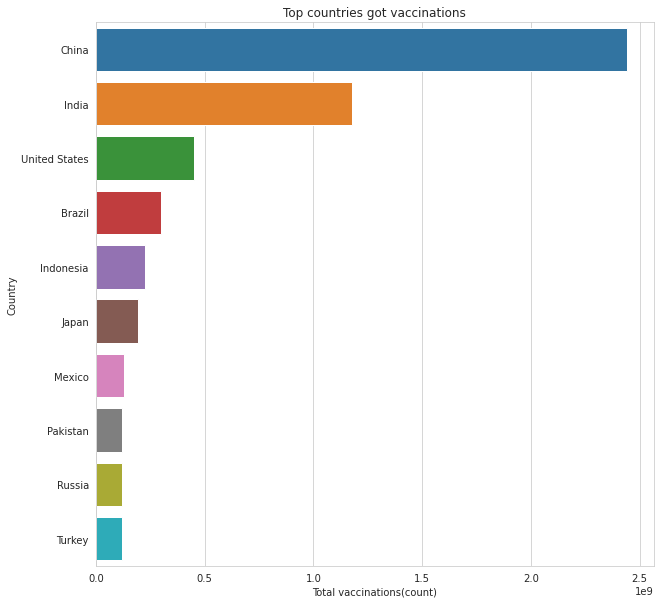

In [12]:
#Find top countries with got vaccinations
x= data.groupby("country")["Total vaccinations in count"].mean().sort_values(ascending= False).head(10)
sns.set_style("whitegrid")
plt.figure(figsize= (10,10))
ax=sns.barplot(x=x.values, y=x.index)
ax.set_title ("Top countries got vaccinations")
ax.set_xlabel("Total vaccinations(count)")
ax.set_ylabel("Country")
plt.show()

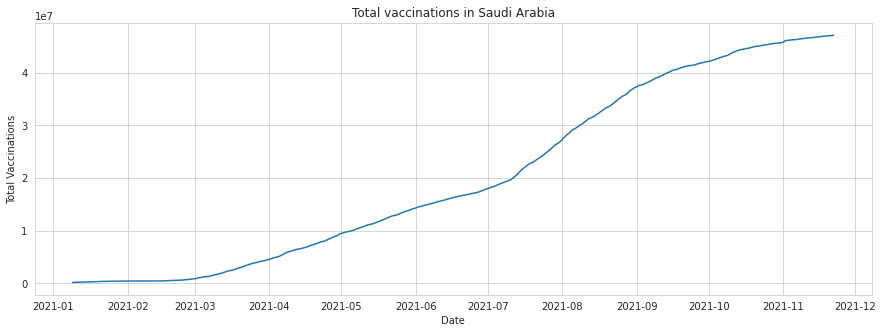

In [13]:
#Total vaccinations in Saudi
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Total vaccinations in Saudi Arabia")
sns.lineplot(x= "date",y= "total_vaccinations",data= data[data["country"]=="Saudi Arabia"])
plt.show()

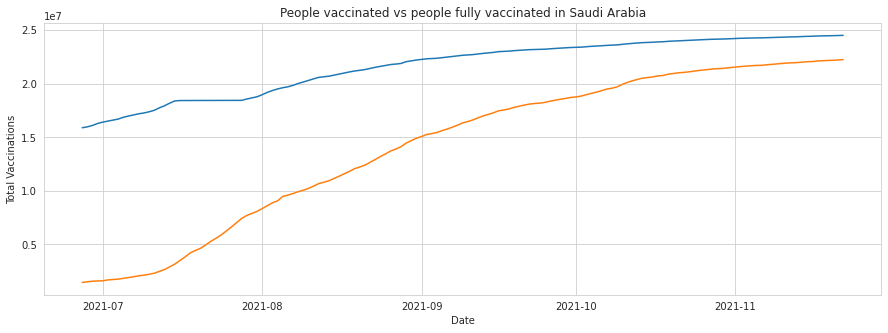

In [14]:
#People vaccinated vs people fully vaccinated in Saudi Arabia
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("People vaccinated vs people fully vaccinated in Saudi Arabia")
sns.lineplot(x= "date",y= "people_vaccinated",data= data[data["country"]=="Saudi Arabia"])
sns.lineplot(x= "date",y= "people_fully_vaccinated",data= data[data["country"]=="Saudi Arabia"])
plt.show()

# Data Modeling

In [15]:
#For simplicity I just take the target variables and the date
dataset = data[['country','date','daily_vaccinations']]
dataset = dataset.loc[dataset['country'] == "Saudi Arabia"]
dataset.sort_values(by='date', inplace=True)
dataset

,country,date,daily_vaccinations
46212,Saudi Arabia,2021-01-07,13492.0
46213,Saudi Arabia,2021-01-08,13492.0
46214,Saudi Arabia,2021-01-09,13492.0
46215,Saudi Arabia,2021-01-10,14304.0
46216,Saudi Arabia,2021-01-11,14792.0
...,...,...,...
46527,Saudi Arabia,2021-11-18,49632.0
46528,Saudi Arabia,2021-11-19,48941.0
46529,Saudi Arabia,2021-11-20,48671.0
46530,Saudi Arabia,2021-11-21,45343.0


In [16]:
dataset.drop('country', inplace=True, axis=1)

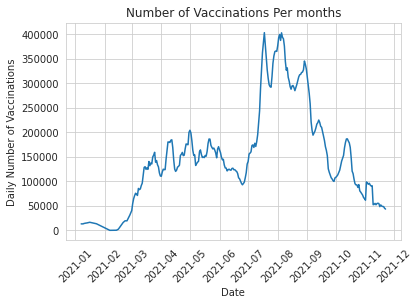

In [17]:
plt.ylabel('Daily Number of Vaccinations')
plt.title ("Number of Vaccinations Per months")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(dataset.date, dataset['daily_vaccinations'], )

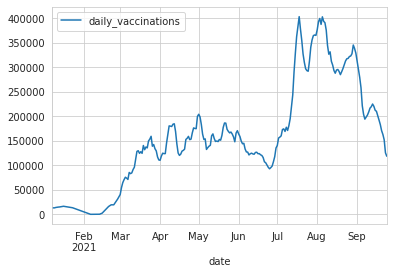

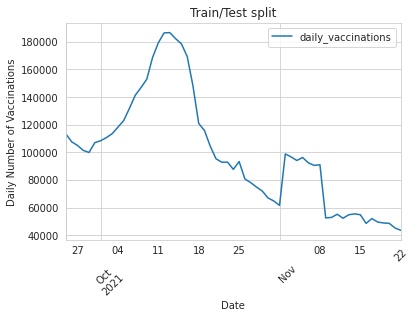

In [18]:
#Make train, test and plot it
train = dataset[dataset.date < pd.to_datetime("2021-09-25", format='%Y-%m-%d')]
test = dataset[dataset.date > pd.to_datetime("2021-09-24", format='%Y-%m-%d')]
train.plot(x='date')
test.plot(x='date')
plt.ylabel('Daily Number of Vaccinations')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

In [19]:
train

,date,daily_vaccinations
46212,2021-01-07,13492.0
46213,2021-01-08,13492.0
46214,2021-01-09,13492.0
46215,2021-01-10,14304.0
46216,2021-01-11,14792.0
...,...,...
46468,2021-09-20,170773.0
46469,2021-09-21,163035.0
46470,2021-09-22,152239.0
46471,2021-09-23,125662.0


In [20]:
dataset.set_index('date',inplace=True)

In [21]:
#Testing For Stationarity
test_result=adfuller(dataset['daily_vaccinations'])
test_result

(-1.8821293889650352,
 0.34051414238667843,
 16,
 303,
 {'1%': -3.4521175397304784,
  '10%': -2.571877823851692,
  '5%': -2.8711265007266666},
 6263.997047467534)

In [22]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(daily_vaccinations):
    result=adfuller(daily_vaccinations)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [23]:
adfuller_test(dataset['daily_vaccinations'])

ADF Test Statistic : -1.8821293889650352
p-value : 0.34051414238667843
#Lags Used : 16
Number of Observations Used : 303
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
